(up)=
# Uncertainty propagation

## Installation

Install the [pyuncertainnumber](https://github.com/leslieDLcy/PyUncertainNumber) library from [PyPI](https://pypi.org/project/pyuncertainnumber/).

```shell
pip install pyuncertainnumber
```

```{important}
A virtual enviroment is recommended for installation.

Follow the [instructions](https://pyuncertainnumber.readthedocs.io/en/latest/guides/installation.html) for additional details to install `pyuncertainnumber`.
```

In [ ]:
from pyuncertainnumber import UN
import pyuncertainnumber as pun
import numpy as np
import matplotlib.pyplot as plt

## arithmetic of uncertain number

[Probability bounds anlaysis](https://en.wikipedia.org/wiki/Probability_bounds_analysis) combines both interval analysis and probability theory, allowing
rigorous bounds of (arithmetic) functions of random variables to be computed even with partial information.

In [17]:
X = pun.uniform(1, [2,3])
Y = X

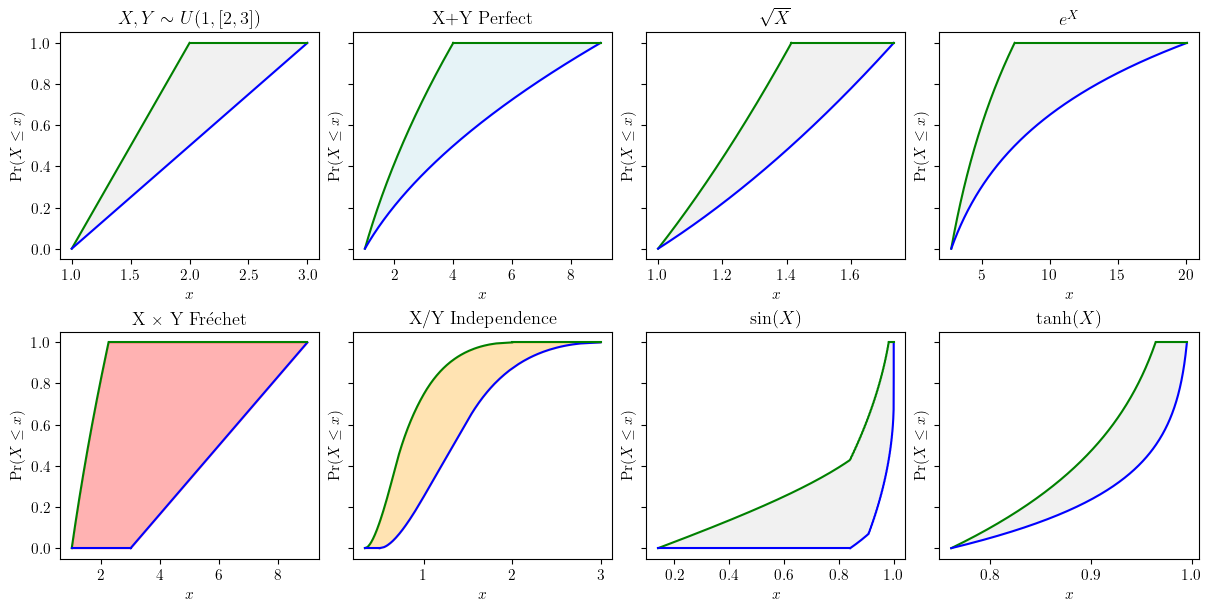

In [18]:
fig, axes = plt.subplots(nrows=2, ncols=4, sharey=True, figsize=(12, 6), layout="constrained")

X.plot(ax=axes[0, 0], title='$X, Y \sim U(1, [2,3])$', nuance='curve')

# add Perfect
Z_add_p = X.mul(Y, dependency='p')
Z_add_p.plot(ax=axes[0, 1], title='X+Y Perfect', fill_color='lightblue', nuance='curve')

# mul Opposite
Z_mul_o = X.mul(Y, dependency='o')
Z_mul_f = X.mul(Y, dependency='f')
Z_mul_f.plot(ax=axes[1, 0], title="X × Y Fréchet", fill_color='red', nuance='curve')

# div Independence
Z_div_i = X.div(Y, dependency='i')
Z_div_f = X.div(Y, dependency='f')
Z_div_i.plot(ax=axes[1, 1], title='X/Y Independence', fill_color='orange', nuance='curve')

### unary ops ###
# squared
(X**0.5).plot(ax=axes[0,2], title='$\sqrt{X}$', nuance='curve')

# exponential
X.exp().plot(ax=axes[0,3], title='$e^{X}$', nuance='curve')

# sin
X.sin().plot(ax=axes[1,2], title='$\sin(X)$', nuance='curve')

# tanh
X.tanh().plot(ax=axes[1,3], title=r"$\tanh (X)$", nuance='curve')

plt.show()

```{note}
**beyond arithmetic**

Beyond arithmetics, various advanced methods have been proposed for propagation of diﬀerent types of uncertainties, intrusive or nonintrusive, depending on the characteristic of the performance function such as linearity, monotonicity, or the accessibility to gradients. See additional details in the [documentation](https://pyuncertainnumber.readthedocs.io/en/latest/guides/up.html).

A high-level API has been provided for delpoying these various methods under various uncertainty situations with a consistent signature.
```

## generic propagation of uncertain numbers

In [19]:
from pyuncertainnumber import Propagation

In [20]:
a = pun.I(2, 3)
b = pun.normal(10, 1)
c = pun.normal([6, 9], 3)

In [21]:
# specify a response function
def foo(x):  
    if isinstance(x, np.ndarray):
        if x.ndim == 1:
            x = x[None, :]
        return x[:, 0] ** 3 + x[:, 1] + x[:, 2]# vectorised signature
    else:
        return x[0] ** 3 + x[1] + x[2]  # iterable signature

In [22]:
# intrusive call signature as drop-in replacements
response = foo([a, b, c])

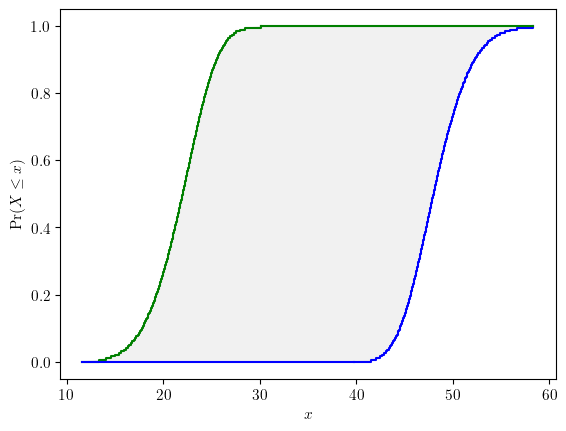

In [23]:
response.display()

In [24]:
# a generic call signature
p = Propagation(vars=[a, b, c], func=foo, method='slicing', interval_strategy='subinterval')
response = p.run(n_slices=50, n_sub=2, style='endpoints')

INFO: mixed uncertainty propagation


```{warning}
**exponentially growing computational load**
The computational cost increases exponentially with the number of input variables and the number of slices. Be cautious with the choice of number of slices `n_slices` given the number of input variables of the response function.
```


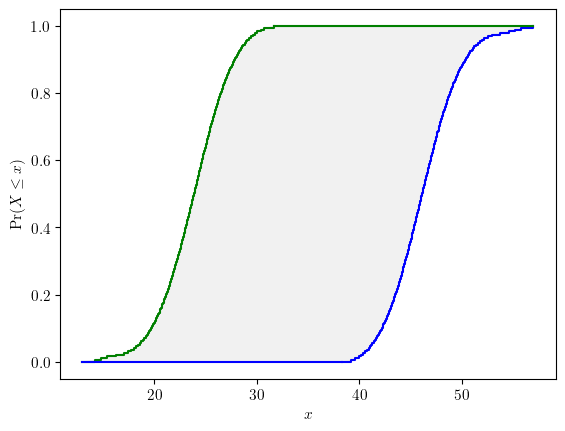

In [25]:
response.display()